<a href="https://colab.research.google.com/github/ilhamije/multisensorHAR/blob/main/clientside_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.6.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

**DATA IMPORT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


`subject_number = [3, 6, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 27, 29]`

In [ ]:
# done_subject = ['3', '6', '13', '14', '15', '16', '17', '18', '19', '20', '22', '23', '27']
# selected_subject = '29'

In [ ]:
file = open('drive/MyDrive/Colab-Notebooks/assessment-hankuk/train_29.csv') # change the file name
lines = file.readlines()

In [ ]:
processed_list = []
cnt = 0

for line in lines[1:]:
    line = line.strip()
    line = line.split(',')
    cnt += 1
    line.append(str(cnt))
    processed_list.append(line)

In [ ]:
column = ['subject','acc1_x','acc1_y','acc1_z','gyro1_x','gyro1_y','gyro1_z','acc2_x','acc2_y','acc2_z','label', 'cnt']

In [ ]:
data = pd.DataFrame(data = processed_list, columns = column)
data.head(10)

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label,cnt
0,29,-0.005372106,-0.008548256,-0.01334744,-0.09118779,-0.03591671,0.03002317,1.016472,0.04200207,0.05114116,5,1
1,29,0.00419351,-0.01582647,-0.009470762,-0.06707478,-0.01649704,0.02570295,1.026195,0.03443459,0.0544176,5,2
2,29,0.01316339,-0.01997815,0.008596474,-0.008806438,0.03869654,0.01799185,1.035315,0.02999931,0.07188964,5,3
3,29,0.005197626,-0.01537972,0.02217544,0.1408581,0.03461543,0.02413251,1.027494,0.03431935,0.08487975,5,4
4,29,-0.00270897,-0.01440997,0.01365299,0.1708428,0.03797364,0.0264409,1.019727,0.0350154,0.07577654,5,5
5,29,0.002050705,-0.01608373,-0.003492266,0.1162911,0.05621436,0.02479809,1.02462,0.03307225,0.05806038,5,6
6,29,0.0005915091,-0.01703527,0.004534972,0.1076753,0.04926646,0.0164387,1.02329,0.03185524,0.06552776,5,7
7,29,-0.005442816,-0.01230616,0.0007024375,0.03595387,0.0644664,-0.003636126,1.017379,0.03632243,0.06114727,5,8
8,29,-0.008505979,-0.006972533,-0.005782679,0.005484098,0.03373525,0.003506545,1.014434,0.04139744,0.05412677,5,9
9,29,-0.0100715,-0.007221333,0.01652651,0.03286098,-0.008011129,0.009906385,1.012981,0.04089325,0.07591375,5,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  42368 non-null  object
 1   acc1_x   42368 non-null  object
 2   acc1_y   42368 non-null  object
 3   acc1_z   42368 non-null  object
 4   gyro1_x  42368 non-null  object
 5   gyro1_y  42368 non-null  object
 6   gyro1_z  42368 non-null  object
 7   acc2_x   42368 non-null  object
 8   acc2_y   42368 non-null  object
 9   acc2_z   42368 non-null  object
 10  label    42368 non-null  object
 11  cnt      42368 non-null  object
dtypes: object(12)
memory usage: 3.9+ MB


In [ ]:
data.isnull().sum()

subject    0
acc1_x     0
acc1_y     0
acc1_z     0
gyro1_x    0
gyro1_y    0
gyro1_z    0
acc2_x     0
acc2_y     0
acc2_z     0
label      0
cnt        0
dtype: int64

In [ ]:
data['label'].value_counts()

6    8832
4    7680
5    7552
1    6784
2    6272
3    5248
Name: label, dtype: int64

**DATA CLEANSING**

In [ ]:
data['acc1_x'] = data['acc1_x'].astype('float')
data['acc1_y'] = data['acc1_y'].astype('float')
data['acc1_z'] = data['acc1_z'].astype('float')
data['gyro1_x'] = data['gyro1_x'].astype('float')
data['gyro1_y'] = data['gyro1_y'].astype('float')
data['gyro1_z'] = data['gyro1_z'].astype('float')
data['acc2_x'] = data['acc2_x'].astype('float')
data['acc2_y'] = data['acc2_y'].astype('float')
data['acc2_z'] = data['acc2_z'].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   subject  42368 non-null  object 
 1   acc1_x   42368 non-null  float64
 2   acc1_y   42368 non-null  float64
 3   acc1_z   42368 non-null  float64
 4   gyro1_x  42368 non-null  float64
 5   gyro1_y  42368 non-null  float64
 6   gyro1_z  42368 non-null  float64
 7   acc2_x   42368 non-null  float64
 8   acc2_y   42368 non-null  float64
 9   acc2_z   42368 non-null  float64
 10  label    42368 non-null  object 
 11  cnt      42368 non-null  object 
dtypes: float64(9), object(3)
memory usage: 3.9+ MB


In [ ]:
activities = data['label'].value_counts().index
activities

Index(['6', '4', '5', '1', '2', '3'], dtype='object')

In [ ]:
Fs = 20

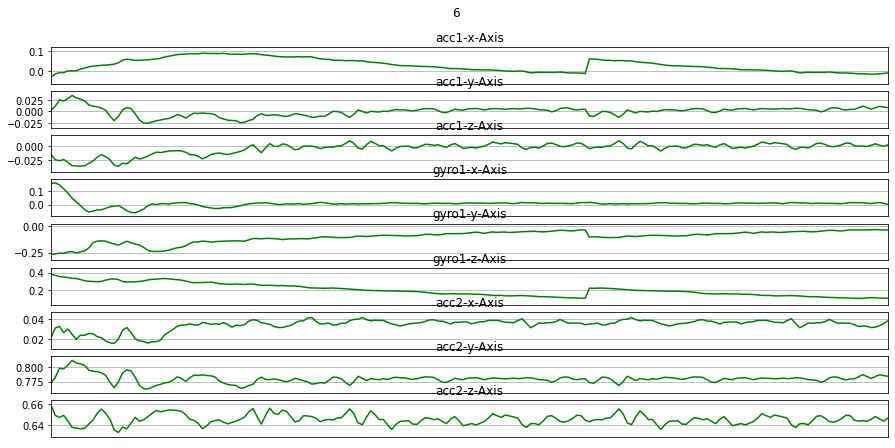

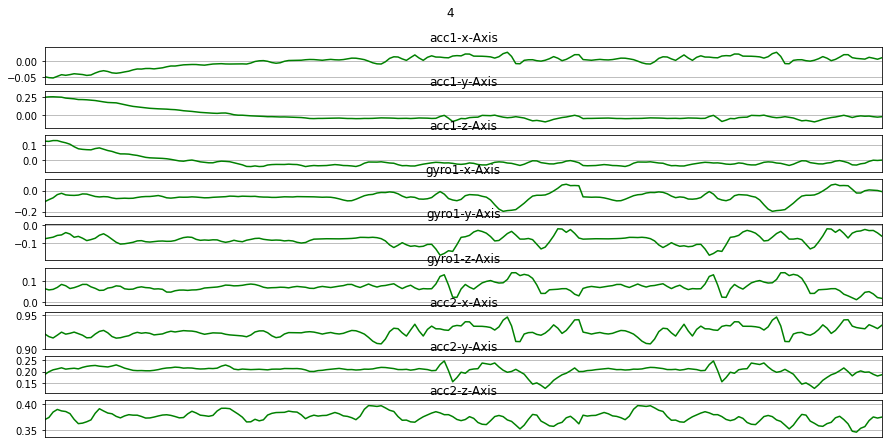

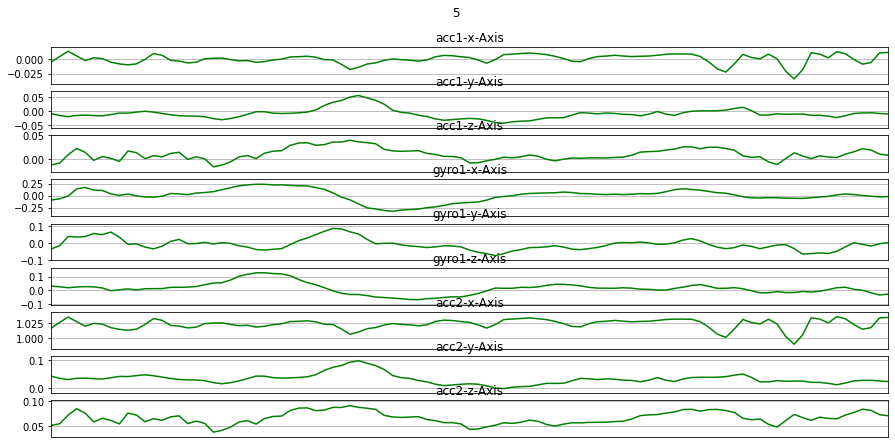

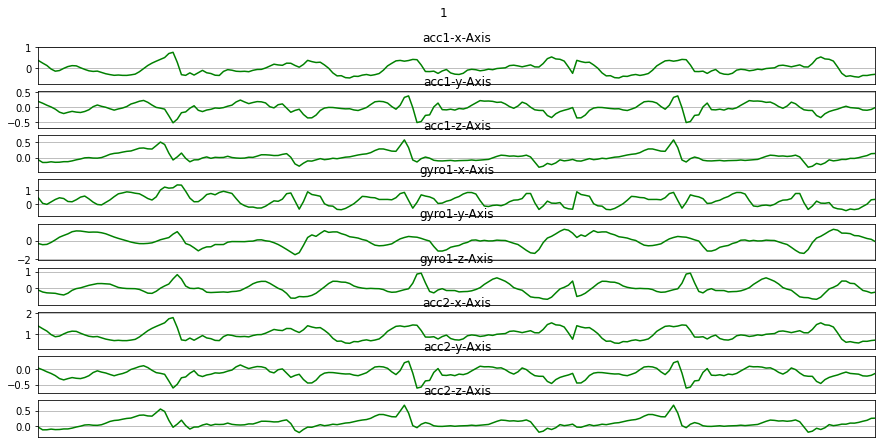

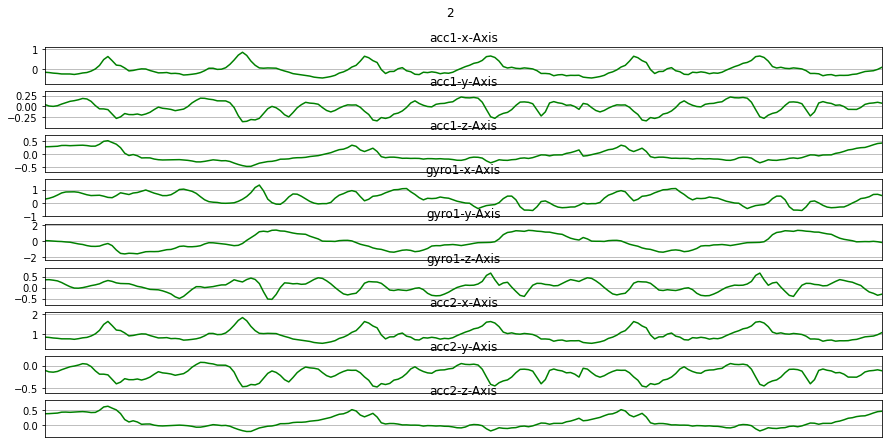

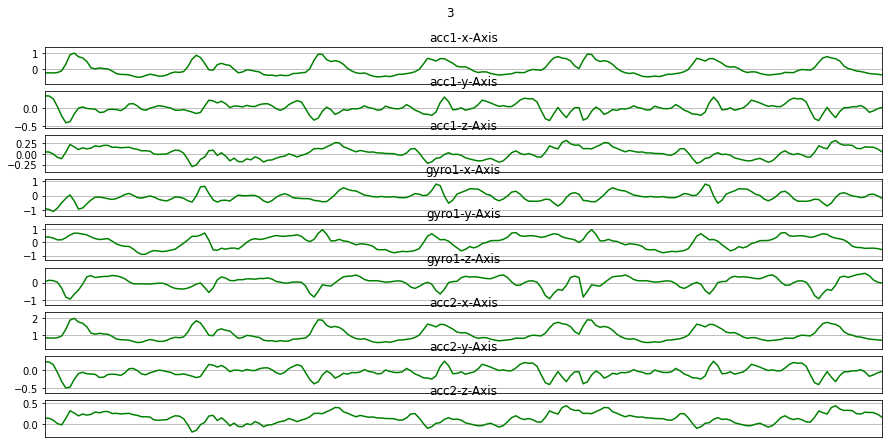

In [ ]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = \
        plt.subplots(nrows=9, figsize=(15, 7), sharex=True)
    # plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax0, data['cnt'], data['acc1_x'], 'acc1-x-Axis')
    plot_axis(ax1, data['cnt'], data['acc1_y'], 'acc1-y-Axis')
    plot_axis(ax2, data['cnt'], data['acc1_z'], 'acc1-z-Axis')
    plot_axis(ax3, data['cnt'], data['gyro1_x'], 'gyro1-x-Axis')
    plot_axis(ax4, data['cnt'], data['gyro1_y'], 'gyro1-y-Axis')
    plot_axis(ax5, data['cnt'], data['gyro1_z'], 'gyro1-z-Axis')
    plot_axis(ax6, data['cnt'], data['acc2_x'], 'acc2-x-Axis')
    plot_axis(ax7, data['cnt'], data['acc2_y'], 'acc2-y-Axis')
    plot_axis(ax8, data['cnt'], data['acc2_z'], 'acc2-z-Axis')
    
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['label'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [ ]:
df = data.drop(['subject', 'cnt'], axis = 1).copy()
df.head()

,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,-0.005372,-0.008548,-0.013347,-0.091188,-0.035917,0.030023,1.016472,0.042002,0.051141,5
1,0.004194,-0.015826,-0.009471,-0.067075,-0.016497,0.025703,1.026195,0.034435,0.054418,5
2,0.013163,-0.019978,0.008596,-0.008806,0.038697,0.017992,1.035315,0.029999,0.071890,5
3,0.005198,-0.015380,0.022175,0.140858,0.034615,0.024133,1.027494,0.034319,0.084880,5
4,-0.002709,-0.014410,0.013653,0.170843,0.037974,0.026441,1.019727,0.035015,0.075777,5


In [ ]:
df['label'].value_counts()
# then get the lowest counts

6    8832
4    7680
5    7552
1    6784
2    6272
3    5248
Name: label, dtype: int64

In [ ]:
# 1. Walking activity
# 2. Walking up the stairs activity
# 3. Walking down the stairs activity
# 4. Sitting activity
# 5. Standing activity
# 6. Laying down activity


In [ ]:
Laying = df[df['label']=='6'].head(5248).copy()  #change the head
Upstairs = df[df['label']=='2'].head(5248).copy()  #change the head
Walking = df[df['label']=='1'].head(5248).copy()  #change the head
Standing = df[df['label']=='5'].head(5248).copy()  #change the head
Sitting = df[df['label']=='4'].head(5248).copy()  #change the head
Downstairs = df[df['label']=='3'].head(5248).copy() #change the head

In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Laying, Upstairs, Walking, Standing, Sitting, Downstairs])
balanced_data.shape

(31488, 10)

In [ ]:
balanced_data['label'].value_counts()

1    5248
4    5248
3    5248
5    5248
6    5248
2    5248
Name: label, dtype: int64

In [ ]:
balanced_data.head()

,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
7168,-0.032098,0.003535,-0.014991,0.158365,-0.266864,0.383402,0.021745,0.772710,0.659118,6
7169,-0.016561,0.011784,-0.024829,0.163961,-0.261605,0.367805,0.031115,0.782474,0.649130,6
7170,-0.009051,0.025890,-0.026638,0.147290,-0.254878,0.355309,0.032645,0.798015,0.647147,6
7171,-0.009561,0.023516,-0.024361,0.119175,-0.255216,0.348722,0.026347,0.796999,0.649228,6
7172,-0.000249,0.028744,-0.029788,0.086709,-0.243830,0.343404,0.030063,0.803511,0.643583,6


In [ ]:
label = LabelEncoder()
label.classes_ = [Laying, Upstairs, Walking, Standing, Sitting, Downstairs]

**DATA STANDARIZATION**

In [ ]:
X = balanced_data[['acc1_x', 'acc1_y', 'acc1_z', 'gyro1_x', 'gyro1_y', 'gyro1_z', 'acc2_x', 'acc2_y', 'acc2_z']]
y = balanced_data['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(data = X, columns = ['acc1_x', 'acc1_y', 'acc1_z', 'gyro1_x', 'gyro1_y', 'gyro1_z', 'acc2_x', 'acc2_y', 'acc2_z'])
scaled_X['label'] = y
scaled_X

,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,-0.147087,0.040066,-0.125676,0.307618,-0.566463,1.719959,-2.018270,1.909759,1.970905,5
1,-0.077873,0.115195,-0.209632,0.319793,-0.554976,1.649597,-1.995375,1.937350,1.928441,5
2,-0.044422,0.243658,-0.225069,0.283519,-0.540282,1.593218,-1.991635,1.981261,1.920012,5
3,-0.046693,0.222042,-0.205638,0.222346,-0.541021,1.563502,-2.007024,1.978391,1.928857,5
4,-0.005212,0.269652,-0.251955,0.151705,-0.516149,1.539510,-1.997944,1.996790,1.904858,5
...,...,...,...,...,...,...,...,...,...,...
31483,-1.551859,-0.056737,0.315749,-0.390969,-1.411754,0.012116,-0.428545,-0.421813,-0.416931,NaN
31484,-1.171009,-0.614169,0.233757,-0.354519,-1.432031,0.053091,-0.218409,-0.595271,-0.457062,NaN
31485,-0.805975,-0.885990,0.411384,-0.334816,-1.335245,0.032478,-0.017123,-0.680147,-0.367596,NaN
31486,-0.705442,-0.661155,0.455198,-0.293106,-1.276131,-0.107333,0.038884,-0.610968,-0.344541,NaN


**FRAME PREPARATION**

In [ ]:
import scipy.stats as stats

In [ ]:
Fs = 20
frame_size = Fs*4
hop_size = Fs*2

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 9

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        acc1_x = df['acc1_x'].values[i: i + frame_size]
        acc1_y = df['acc1_y'].values[i: i + frame_size]
        acc1_z = df['acc1_z'].values[i: i + frame_size]
        gyro1_x = df['gyro1_x'].values[i: i + frame_size]
        gyro1_y = df['gyro1_y'].values[i: i + frame_size]
        gyro1_z = df['gyro1_z'].values[i: i + frame_size]
        acc2_x = df['acc2_x'].values[i: i + frame_size]
        acc2_y = df['acc2_y'].values[i: i + frame_size]
        acc2_z = df['acc2_z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([acc1_x, acc1_y, acc1_z, gyro1_x, gyro1_y, gyro1_z, acc2_x, acc2_y, acc2_z])
        labels.append(int(label))

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [ ]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [ ]:
X.shape, y.shape

((786, 80, 9), (786,))

In [ ]:
(5248*6)/40. # change it <the lowest value> * feat

787.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape  # copy the value

((628, 80, 9), (158, 80, 9))

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 9), (80, 9))

In [ ]:
X_train = X_train.reshape(628, 80, 9, 1) # put the recent copied value
X_test = X_test.reshape(158, 80, 9, 1) # put the recent copied value

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 9, 1), (80, 9, 1))

**2D CNN MODEL**

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1, batch_size=1)

Epoch 1/10
628/628 [==============================] - 5s 7ms/step - loss: 1.8664 - accuracy: 0.3169 - val_loss: 1.0299 - val_accuracy: 0.6076
Epoch 2/10
628/628 [==============================] - 4s 7ms/step - loss: 1.1147 - accuracy: 0.5621 - val_loss: 0.8891 - val_accuracy: 0.7089
Epoch 3/10
628/628 [==============================] - 4s 7ms/step - loss: 0.8901 - accuracy: 0.6433 - val_loss: 0.9540 - val_accuracy: 0.6835
Epoch 4/10
628/628 [==============================] - 5s 7ms/step - loss: 0.7424 - accuracy: 0.6927 - val_loss: 0.8747 - val_accuracy: 0.6772
Epoch 5/10
628/628 [==============================] - 5s 7ms/step - loss: 0.7216 - accuracy: 0.7038 - val_loss: 0.8441 - val_accuracy: 0.6899
Epoch 6/10
628/628 [==============================] - 5s 7ms/step - loss: 0.6111 - accuracy: 0.7325 - val_loss: 0.8333 - val_accuracy: 0.6329
Epoch 7/10
628/628 [==============================] - 5s 7ms/step - loss: 0.5629 - accuracy: 0.7580 - val_loss: 0.8791 - val_accuracy: 0.7278
Epoch 

In [ ]:
def plot_learningCurve(history, epochs):
    # Plot training & validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

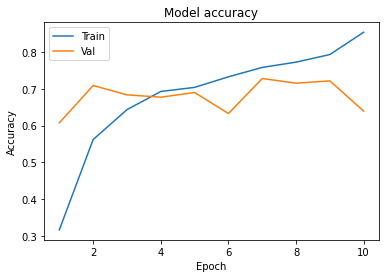

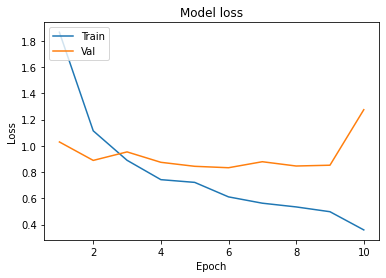

In [ ]:
plot_learningCurve(history, 10)

**CONFUSION MATRIX**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_test)
y_preds = np.argmax(y_pred,axis=1)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe1549cbe50>)

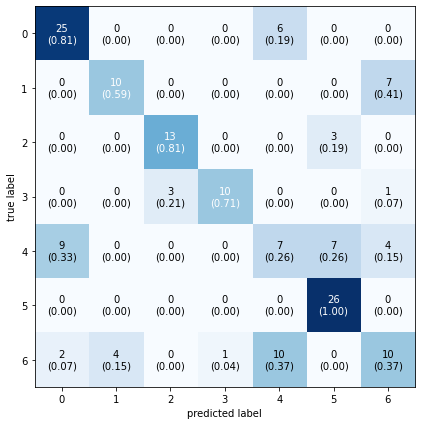

In [ ]:
mat = confusion_matrix(y_test, y_preds)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

In [ ]:
model.save_weights("drive/MyDrive/Colab-Notebooks/assessment-hankuk/" + str(selected_subject) + "_model.h5")